In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#importing required algorithm libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

C:\Users\dixit\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data from csv file 
dp = pd.read_csv("C:/Users/dixit/Desktop/sem3 project/New folder/diabetes.csv")
dp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dp.shape

(768, 9)

In [7]:
dp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dp.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
dp.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Checking for any Missing values
dp.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
#check for 0 in required columns
(dp == 0).head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,True
6,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,True
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [12]:
(dp == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
dp[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dp[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
dp.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
#replacing all the NaN values with Mean values
dp.fillna(dp.mean(),inplace = True)
dp.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
imputer = KNNImputer(n_neighbors=3)
data = imputer.fit_transform(dp)

In [17]:
data = pd.DataFrame(data)
data.shape

(768, 9)

In [18]:
data = data.rename(columns ={0: "Pregnancies", 1: "Glucose" , 2: "BloodPressure" , 3: "SkinThickness" , 4: "Insulin" , 5: "BMI" , 6: "DiabetesPedigreeFunction" , 7: "Age" 
                               , 8: "Outcome"})

In [19]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0,1.0
1,1.0,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0,0.0
2,8.0,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0,1.0
3,1.0,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0,0.0
4,0.0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0,1.0
5,5.0,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0,0.0
6,3.0,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0,1.0
7,10.0,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0,0.0
8,2.0,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0,1.0
9,8.0,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0,1.0


In [20]:
data.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

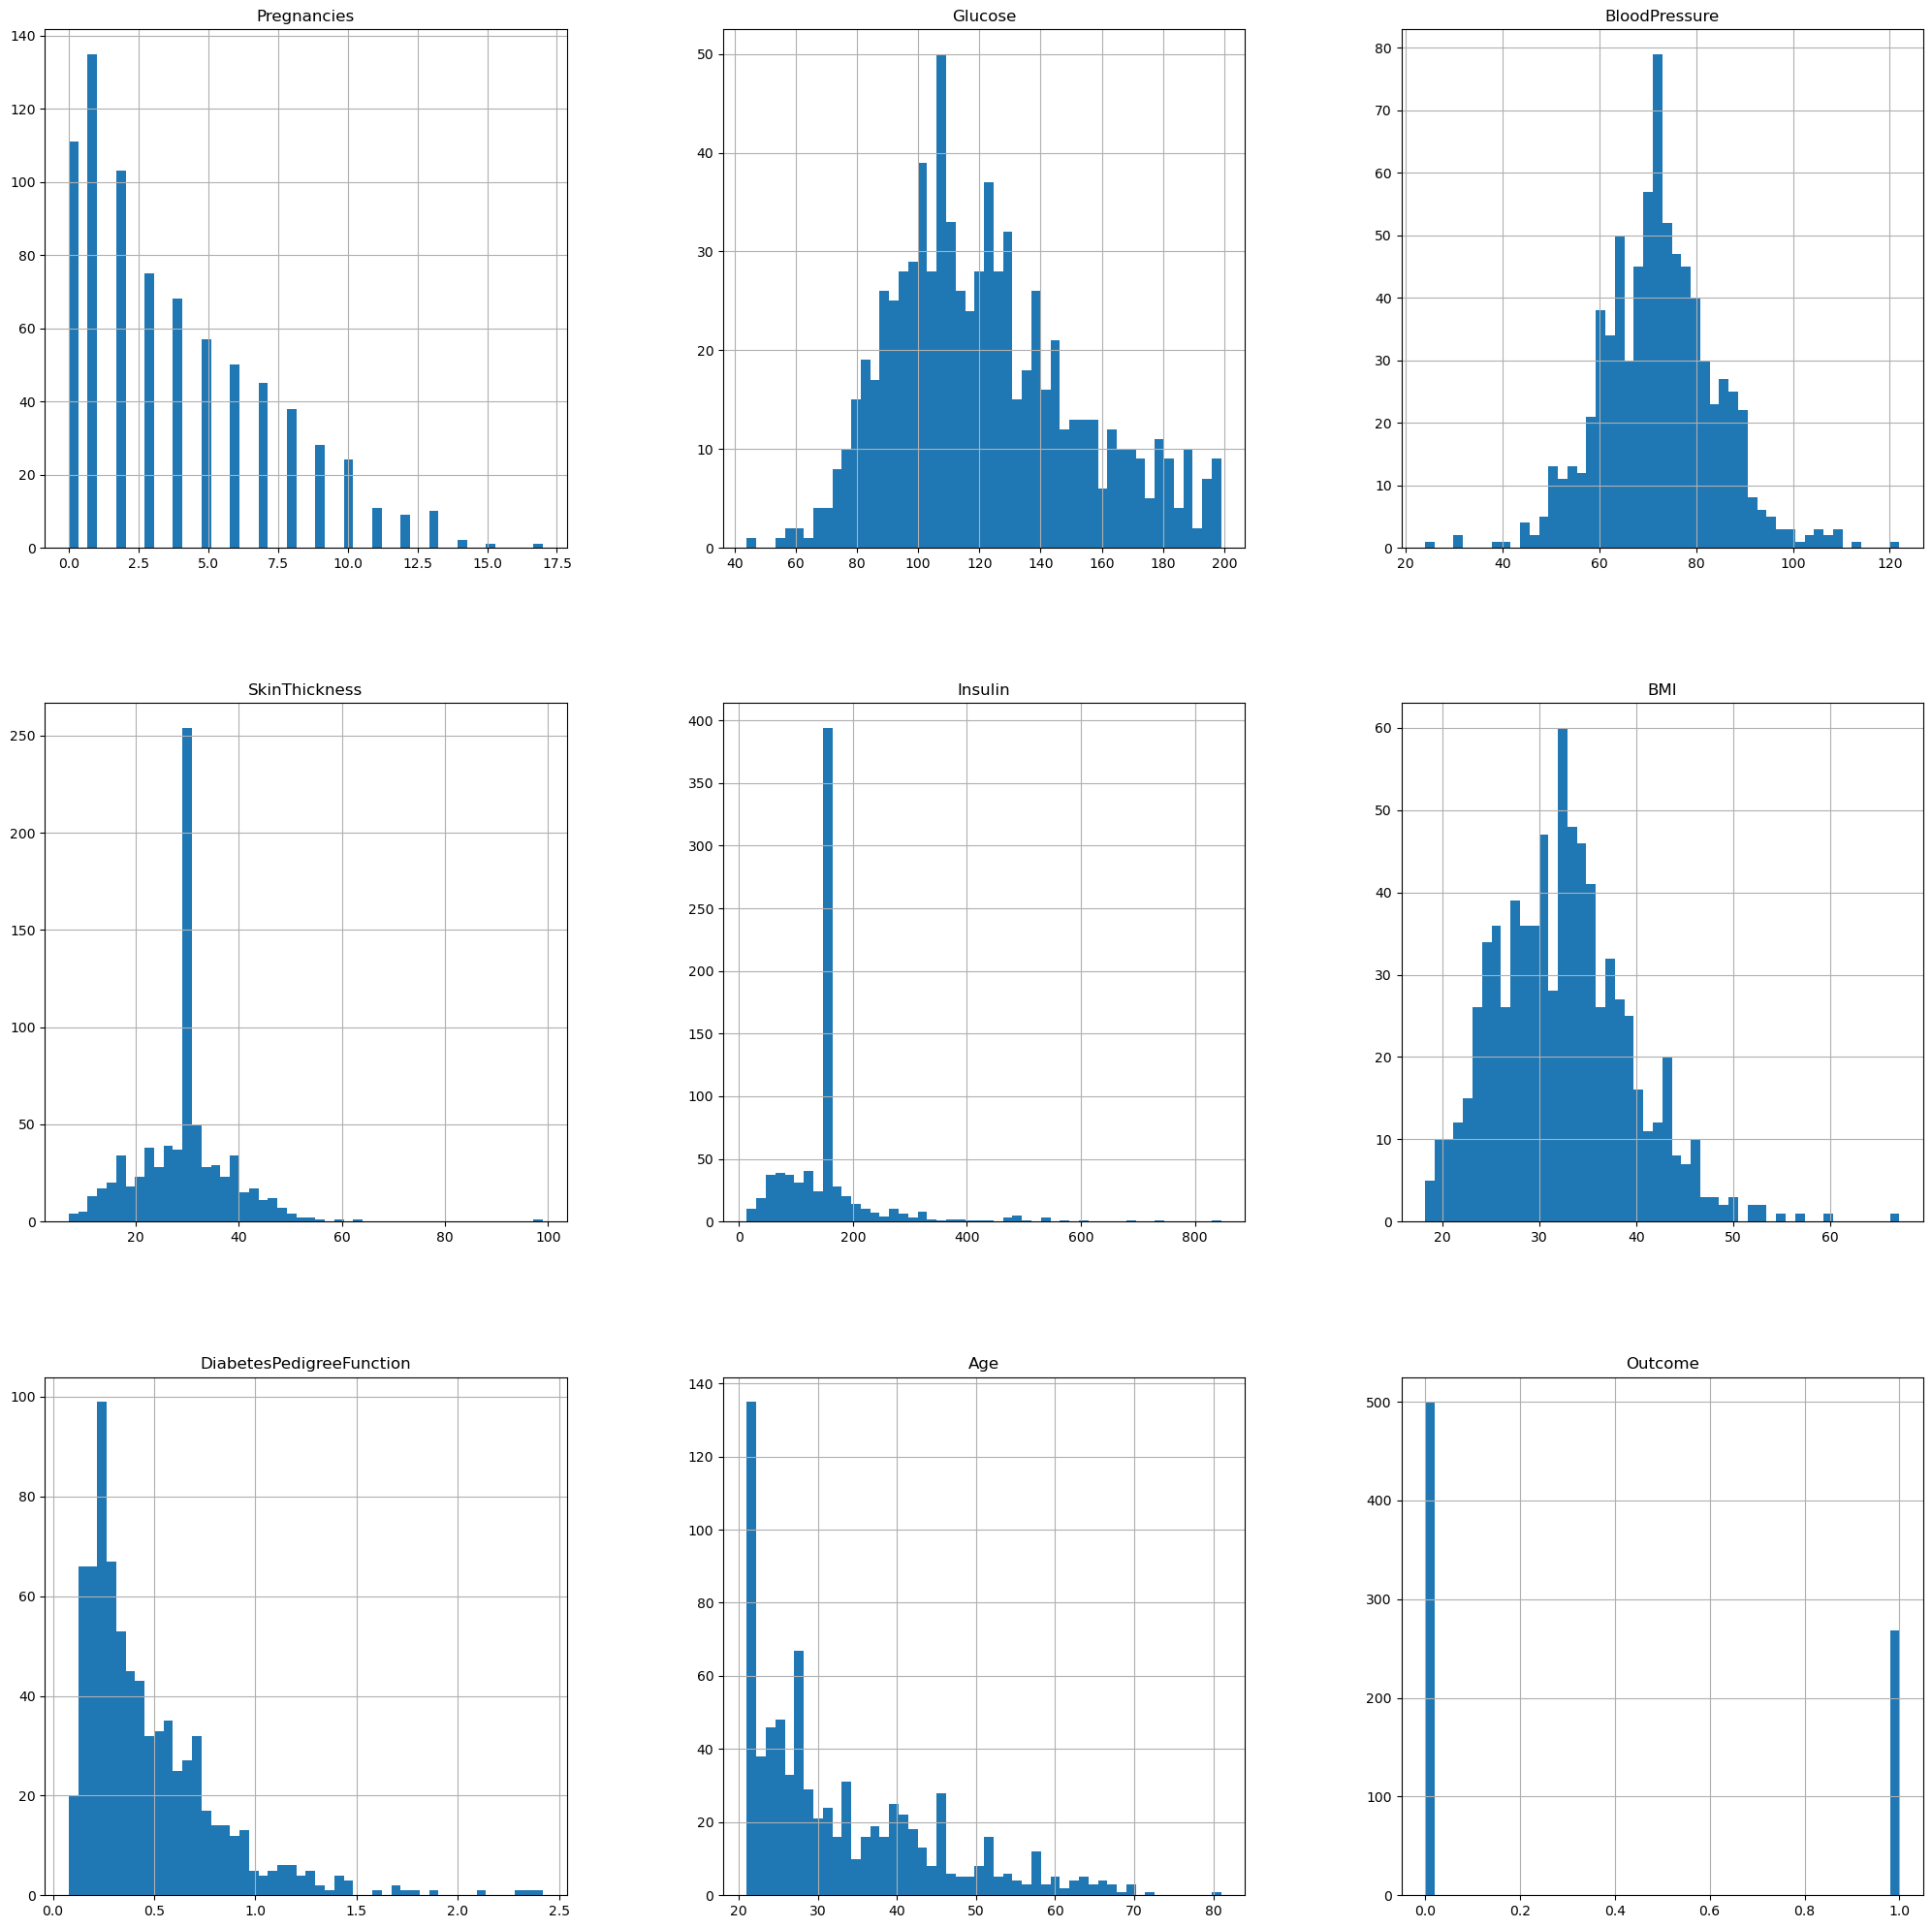

In [21]:
# Visually explore these variables using histograms. 

data.hist(figsize=(25,25), bins=50);

Text(0.5, 1.0, 'Box Plot')

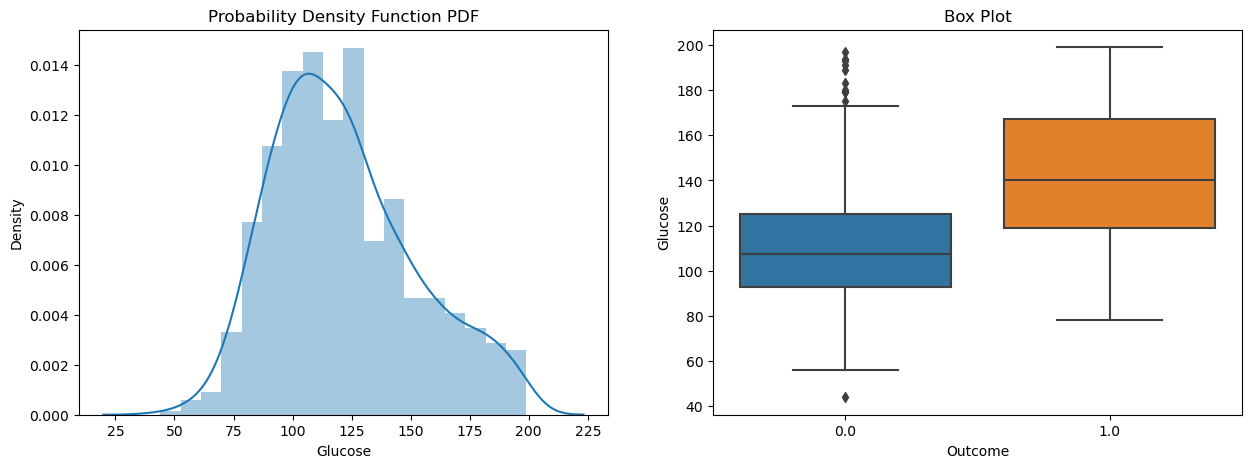

In [22]:
# Finding outliers for individual columns 
#GLUCOSE

fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['Glucose'],ax = axis1).set_title('Probability Density Function PDF')
sns.boxplot (x = 'Outcome', y = 'Glucose', data = data).set_title('Box Plot')

Text(0.5, 1.0, 'Box_Plot')

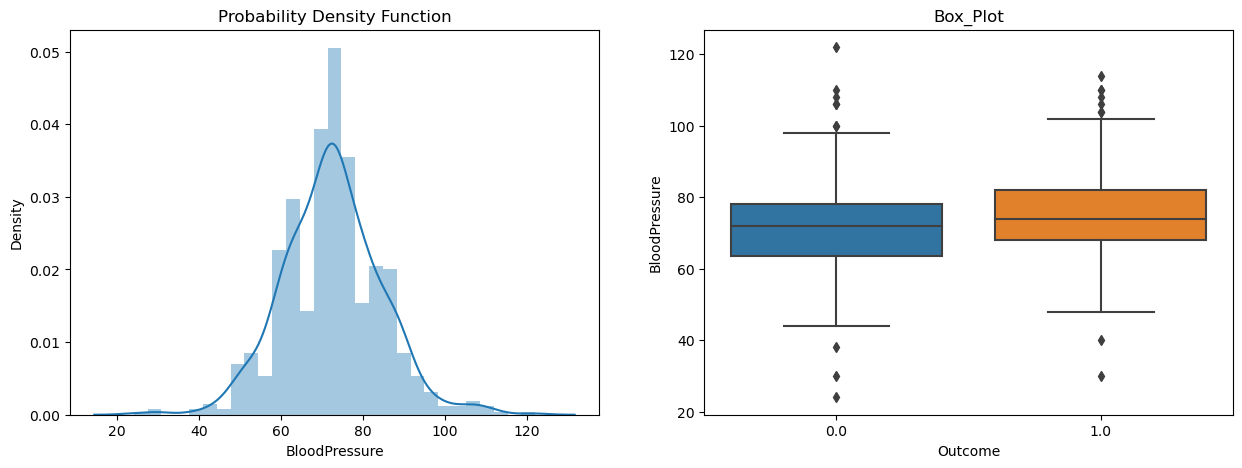

In [23]:
# BLOODPRESSURE

fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['BloodPressure'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x = 'Outcome',y = 'BloodPressure', data = data).set_title('Box_Plot')

Text(0.5, 1.0, 'Box Plot')

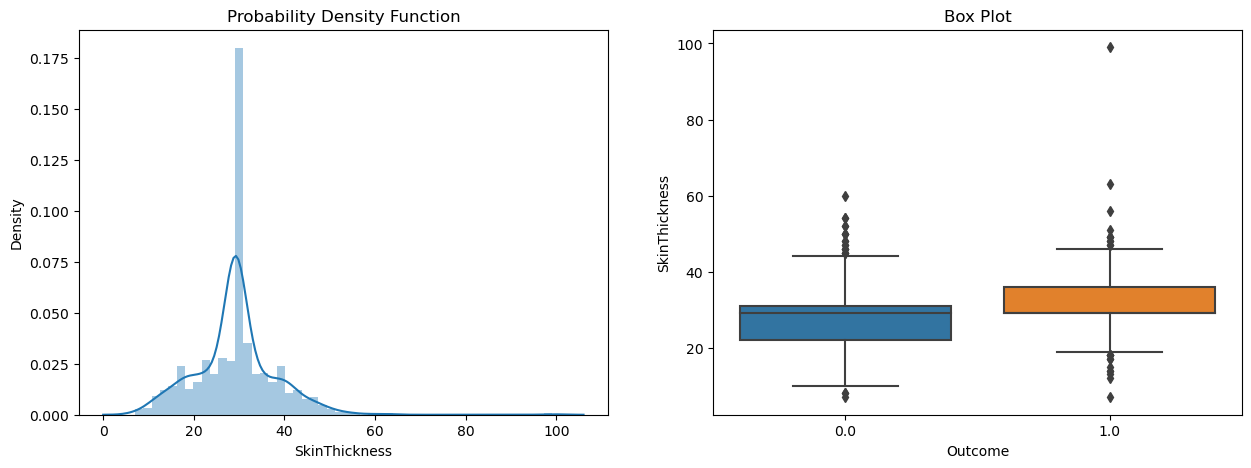

In [24]:
# SkinThickness

fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['SkinThickness'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='SkinThickness',data = data).set_title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

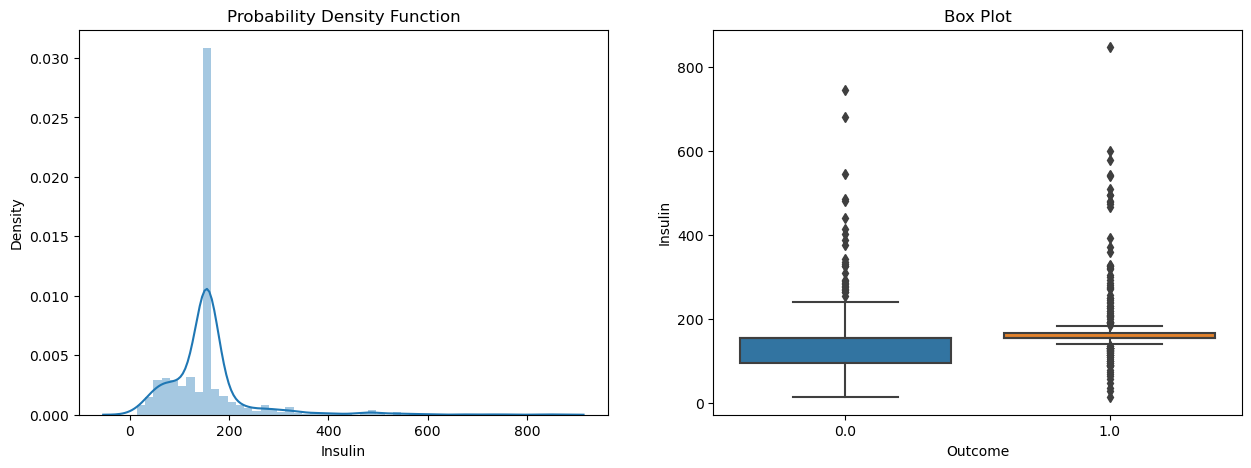

In [25]:
# Insulin

fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data['Insulin'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='Insulin',data=data).set_title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

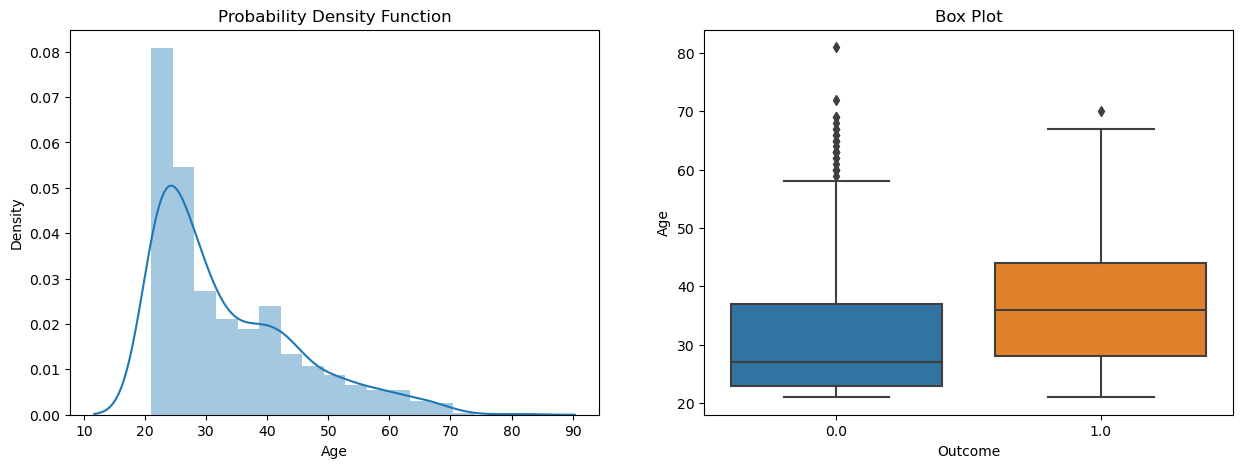

In [26]:
# AGE

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data['Age'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='Age',data = data).set_title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

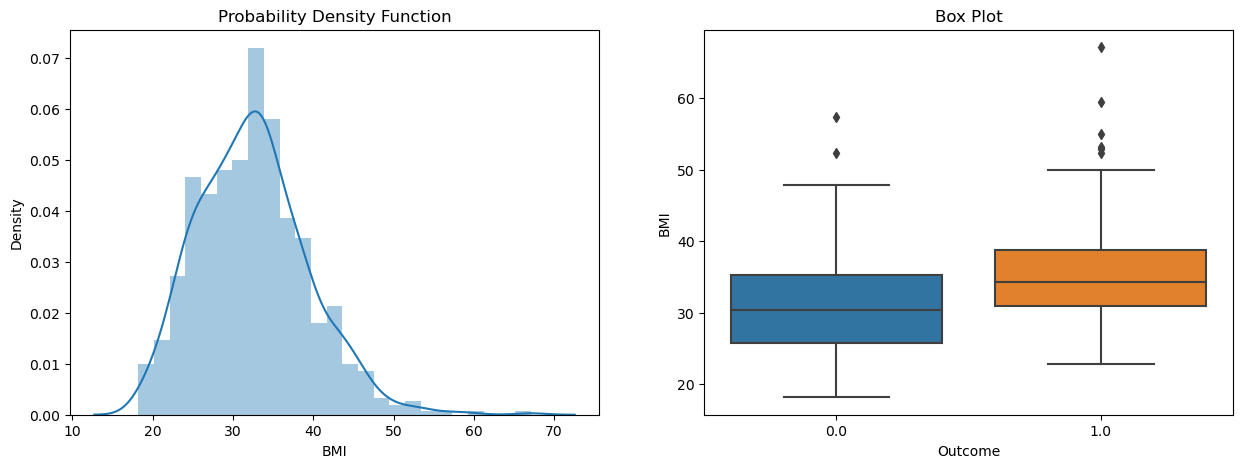

In [27]:
# BMI 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data['BMI'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='BMI',data=data).set_title('Box Plot')

Text(0.5, 1.0, 'Box Plot')

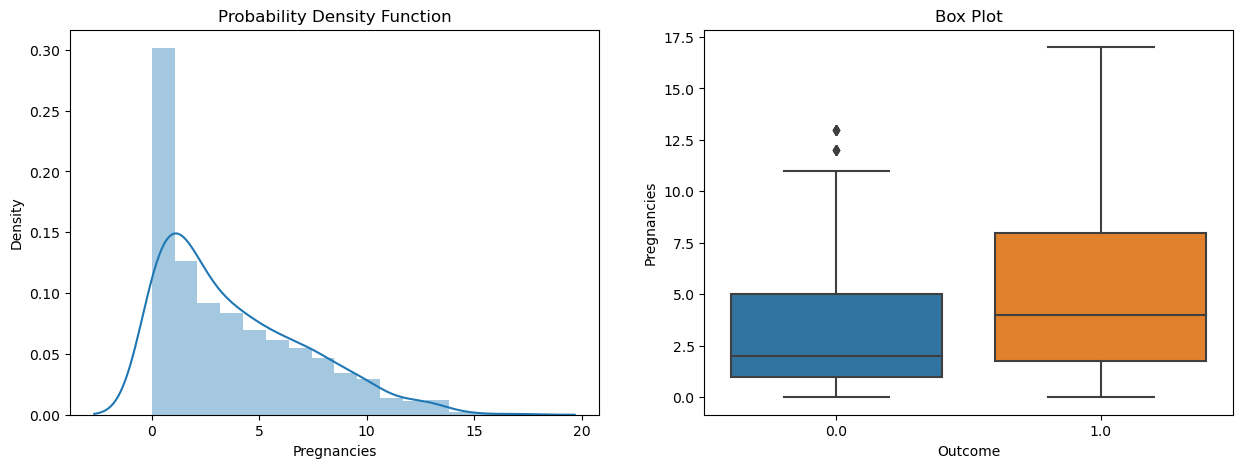

In [28]:
# Pregnancies

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data['Pregnancies'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='Pregnancies',data=data).set_title('Box Plot')

In [29]:
# There are integer and float data type variables in this dataset.

a=data.dtypes.value_counts()
a

float64    9
dtype: int64

Text(0.5, 1.0, 'scatter plot between variables')

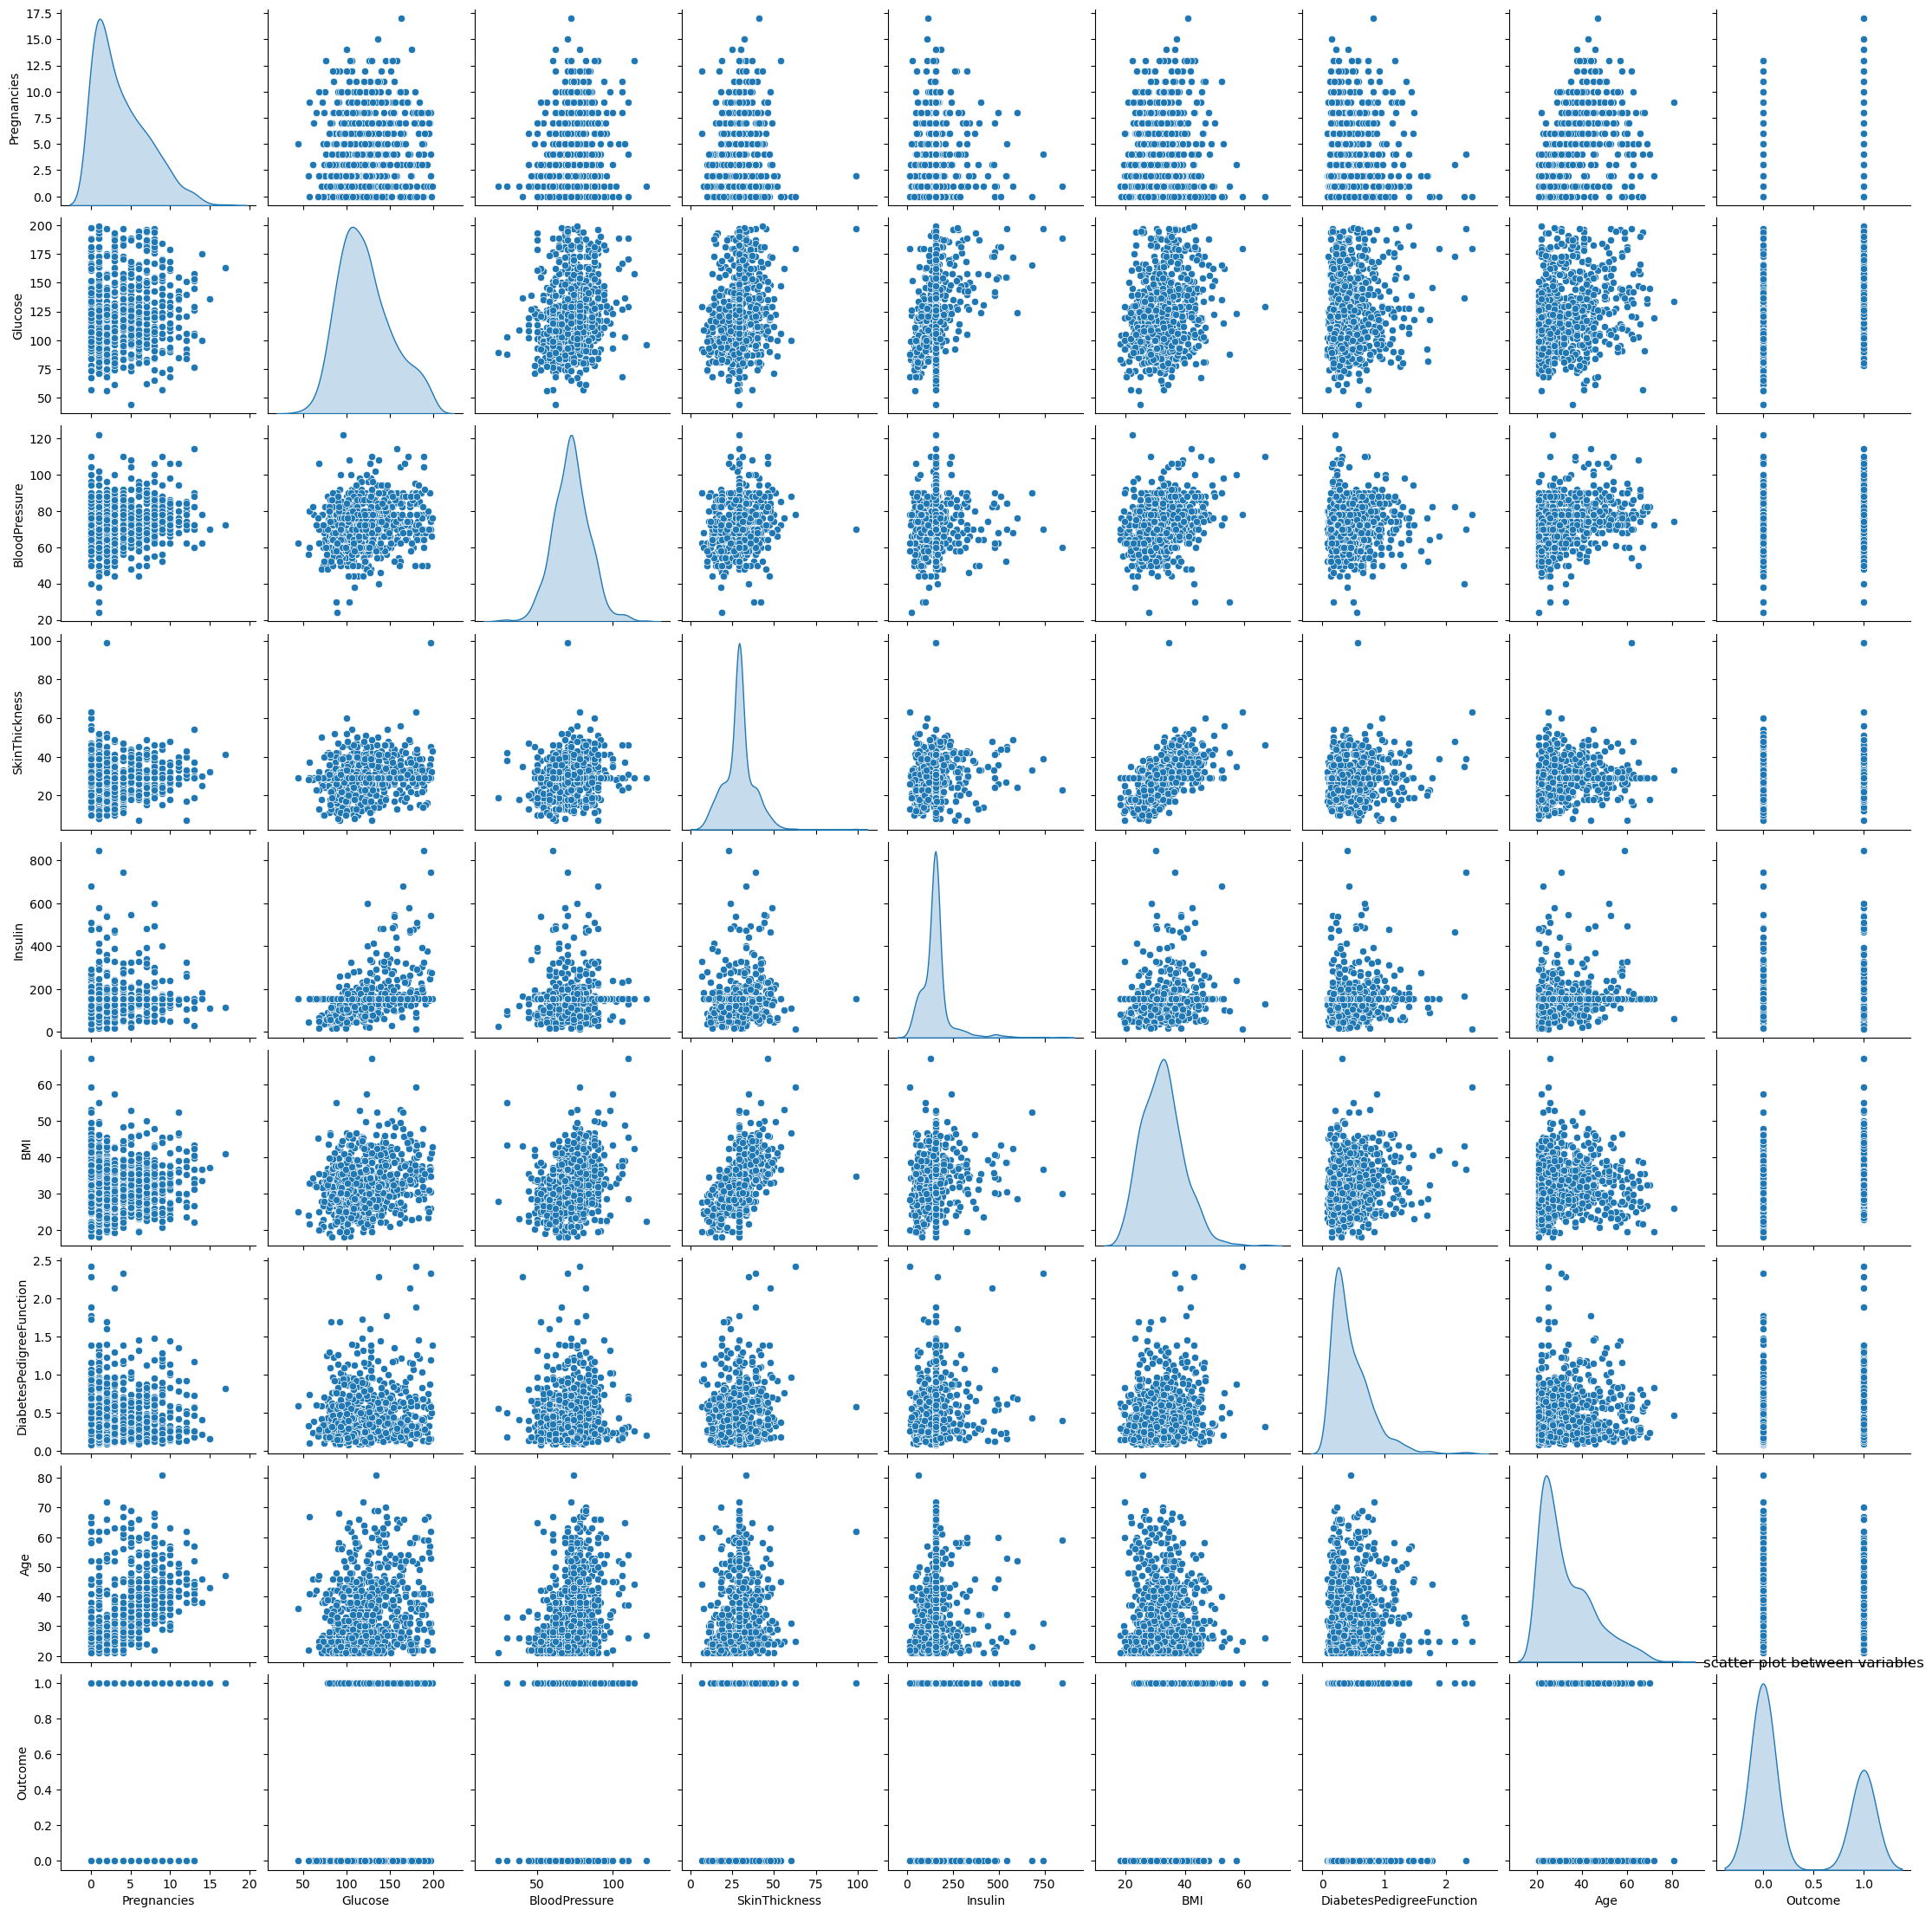

In [30]:
# creating scattered chart 

sns.pairplot(data, diag_kind="kde")
plt.title('scatter plot between variables')

In [31]:
# Perform correlation analysis

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

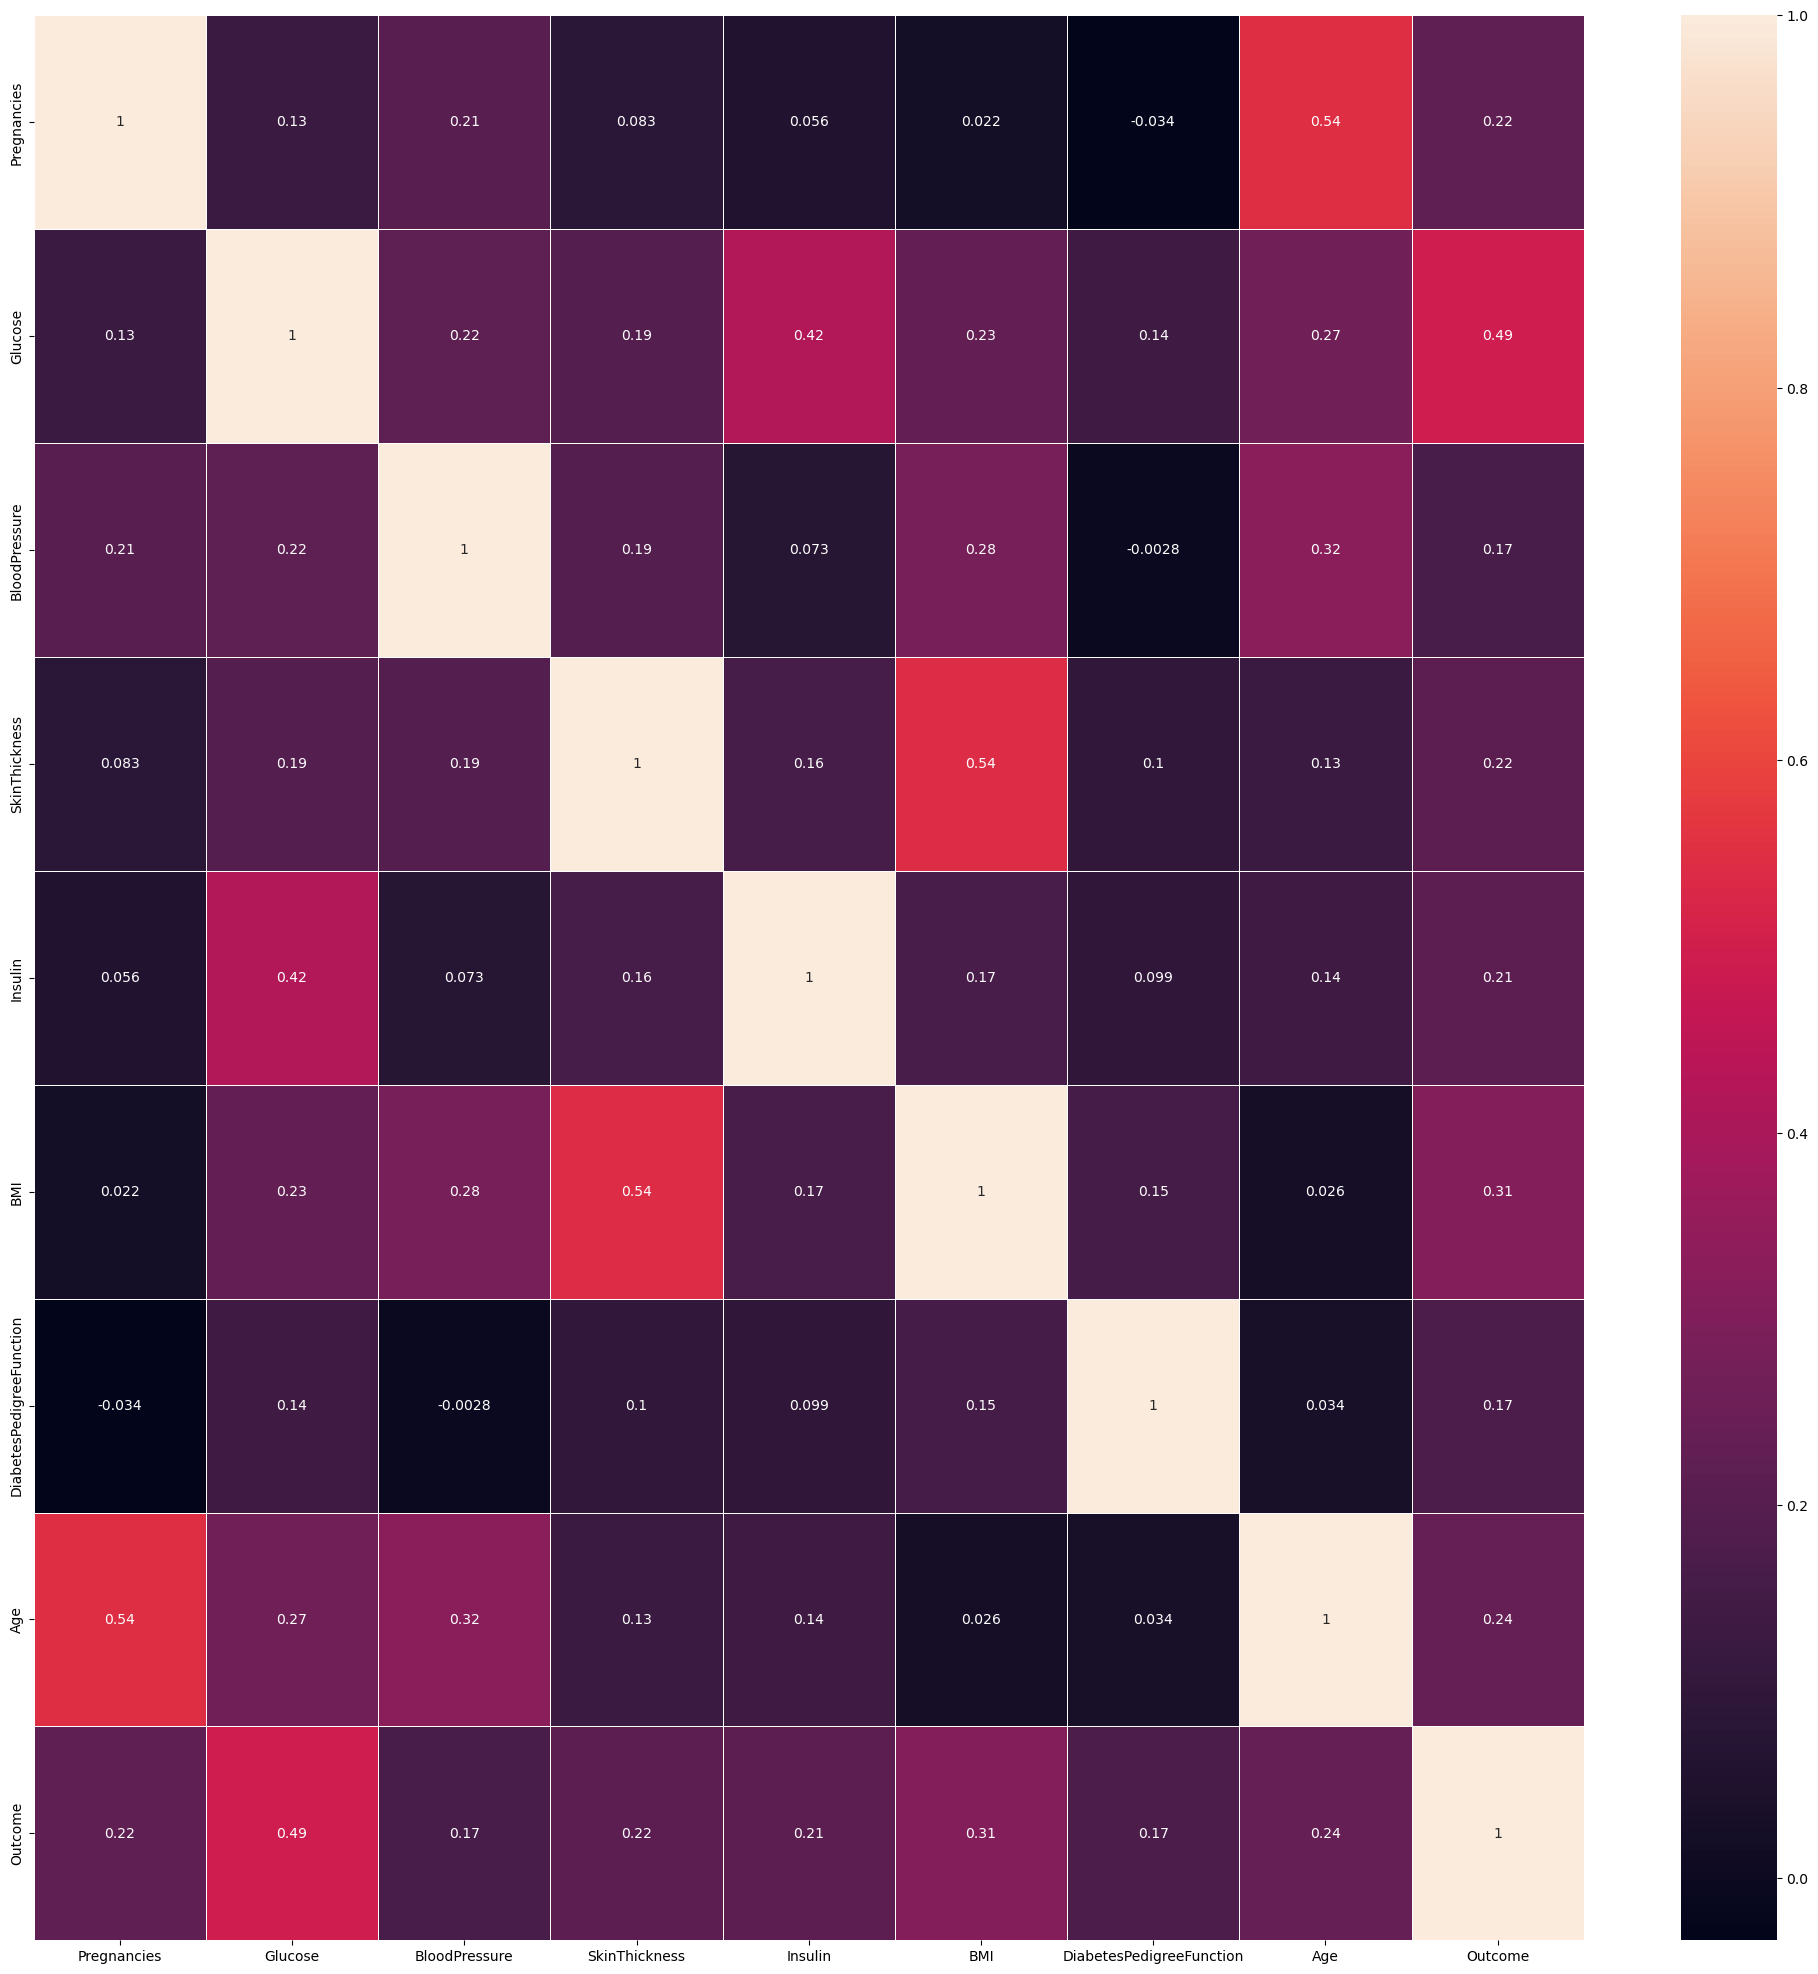

In [32]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,  linewidths=.5)

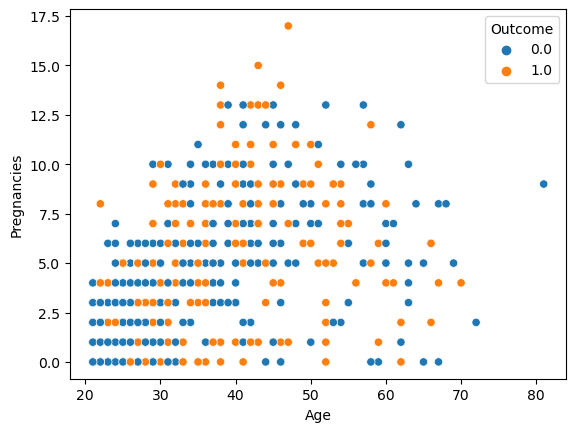

In [33]:
ap  = sns.scatterplot(x="Age", y="Pregnancies", hue="Outcome", data = data)

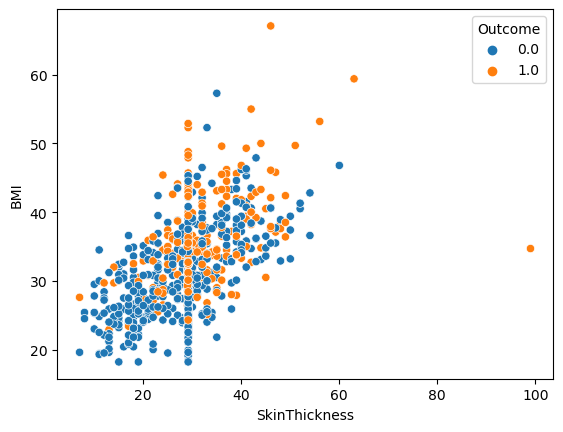

In [34]:
bs = sns.scatterplot(x="SkinThickness", y="BMI", hue="Outcome", data = data)

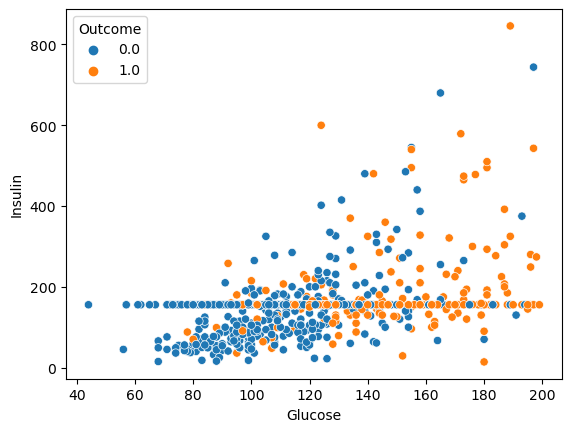

In [35]:
ig = sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome", data = data)

In [36]:
# Data Modeling

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [37]:
#Split the data into Train and Test Data
x = data.drop(['Outcome'],axis=1)
y = data['Outcome']

In [38]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0


In [39]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [41]:
y_train.value_counts()

0.0    393
1.0    221
Name: Outcome, dtype: int64

In [45]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=4)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [47]:
y_train_smote.value_counts()

1.0    393
0.0    393
Name: Outcome, dtype: int64

In [48]:
#Perform Decision tree classifier on training data
#predict output for test dataset using the fitted model

DecisionTree = DecisionTreeClassifier()
model_dt = DecisionTree.fit(x_train_smote,y_train_smote) 

In [49]:
DecScore = DecisionTree.score(x_train_smote,y_train_smote)
print("Decision Tree Score: ",DecScore)

dt_pred=DecisionTree.predict(x_test)
print("\nClassification Report:")
print(metrics.classification_report(y_test,dt_pred),'\n')

Decision Tree Score:  1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       107
         1.0       0.51      0.57      0.54        47

    accuracy                           0.70       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.71      0.70      0.71       154
 



In [50]:
# Random Forest

#Perform Random Forest on training data
#predict output for test dataset using the fitted model

RandomForest = RandomForestClassifier()
model_rf = RandomForest.fit(x_train_smote,y_train_smote)

In [51]:
Rscore = RandomForest.score(x_train_smote,y_train_smote)
print('Random Forest Score: ',Rscore)

rf_pred=RandomForest.predict(x_test)
print("\nClassification Report:")
print(metrics.classification_report(y_test,rf_pred),'\n')

Random Forest Score:  1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       107
         1.0       0.68      0.77      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.83      0.82      0.82       154
 



In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
LR = LogisticRegression()
model_lr = LR.fit(x_train_smote,y_train_smote)

In [54]:
LRs = LR.score(x_train_smote,y_train_smote)
print("LogisticRegression Score: ",LRs)

lr_pred=LR.predict(x_test)
print("\nClassification Report:")
print(metrics.classification_report(y_test,lr_pred),'\n')

LogisticRegression Score:  0.7493638676844784

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.81       107
         1.0       0.58      0.70      0.63        47

    accuracy                           0.75       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.77      0.75      0.76       154
 



In [55]:
#Perform KNN on training data
#predict output for test dataset using the fitted model

knn = KNeighborsClassifier(n_neighbors = 2)
model_knn = knn.fit(x_train_smote,y_train_smote)

In [56]:
knns = knn.score(x_train_smote,y_train_smote)
print("KNN score: ",knns,"\n")

knn_pred=knn.predict(x_test)
print("Classification Report:")
print(metrics.classification_report(y_test,knn_pred))

KNN score:  0.94529262086514 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       107
         1.0       0.59      0.55      0.57        47

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



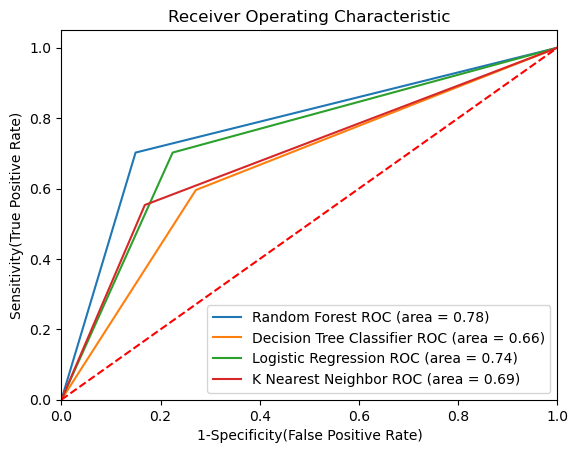

In [57]:
plt.figure()

models = [
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier()
    },
    {
        'label': 'Decision Tree Classifier',
        'model': DecisionTreeClassifier()
    },
    
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression()
    },
    
    {
        'label': 'K Nearest Neighbor',
        'model': KNeighborsClassifier(n_neighbors=2)
    }
]


#Loop iterates through the model  list

for mod in models:
    model = mod['model']
    model.fit(x_train_smote, y_train_smote)
    y_pred = model.predict(x_test)
    
# Compute False postive rate, and True positive rate

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    
# Calculate Area under the curve to display on the plot

    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    
# Now, plot the computed values

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (mod['label'], auc))
    
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
def predict_diabetes(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    x_pred = [Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]
    x_df = pd.DataFrame([x_pred],columns=x.columns)
    return model_rf.predict(x_df)

In [59]:
v1_predict = predict_diabetes(6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0)
if (v1_predict == 1.0):
    print("The person has risk of diabetes")
else:
    print("The person does not has risk of diabetes")

The person has risk of diabetes


In [60]:
v2_predict = predict_diabetes(1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0)
if (v2_predict == 1.0):
    print("The person has risk of diabetes")
else:
    print("The person does not has risk of diabetes")

The person has risk of diabetes


In [61]:
v3_predict = predict_diabetes(0.0,83.0,50.0,24.00000,100.000000,20.1,0.167,29.0)
if (v3_predict == 1.0):
    print("The person has risk of diabetes")
else:
    print("The person does not have a risk of diabetes.")

The person does not has risk of diabetes


In [62]:
v3_predict = predict_diabetes(1.0,90.0,50.0,24.00000,100.000000,20.1,1.167,29.0)
if (v3_predict == 1.0):
    print("The person has a risk of diabetes.")
else:
    print("The person does not have a risk of diabetes.")

The person does not has risk of diabetes
